## Importing Libraries 

In [130]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.preprocessing import StandardScaler
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier

## Loading Dataset

In [2]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Perrforming EDA

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#So there is no missing value in Dataset
#And there is no catogerical data present 

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe() #Descriptive Analysis 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# Most of the columns contain unnecessary 0 which equally acting as NaN so deling with them is necessary

In [12]:
#counting 0
count_zero_sum=(df==0).sum()
print("sum")
count_zero_sum

sum


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [13]:
#In percentage 
zero_counts_prc = (df == 0).mean()*100
print("percentage")
zero_counts_prc

percentage


Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64

In [14]:
#Copy of DataFrame to keep originlal as it is 

df2=df.copy()

In [15]:
ColWith_0= ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [16]:
#Filling the missing values with median 

for i in ColWith_0:
    df2[i] = df[i].replace(0, df2[i].median())

In [17]:
(df2==0).sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

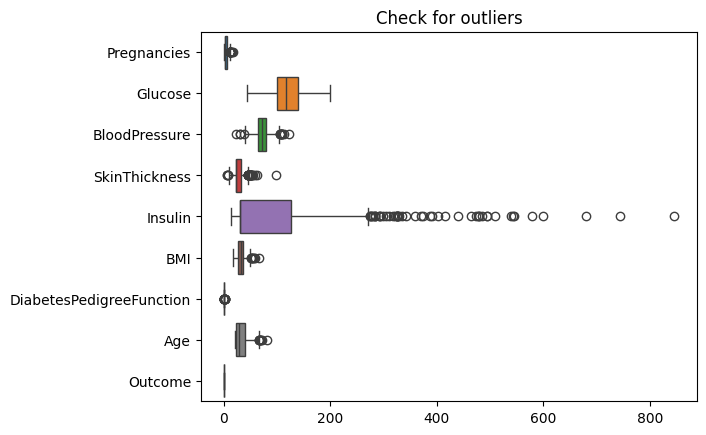

In [18]:
sns.boxplot(df2,orient="h")
plt.title("Check for outliers")
plt.show()

In [19]:
#Corelation between records 
corr_matrix = df2.corr(numeric_only=True)

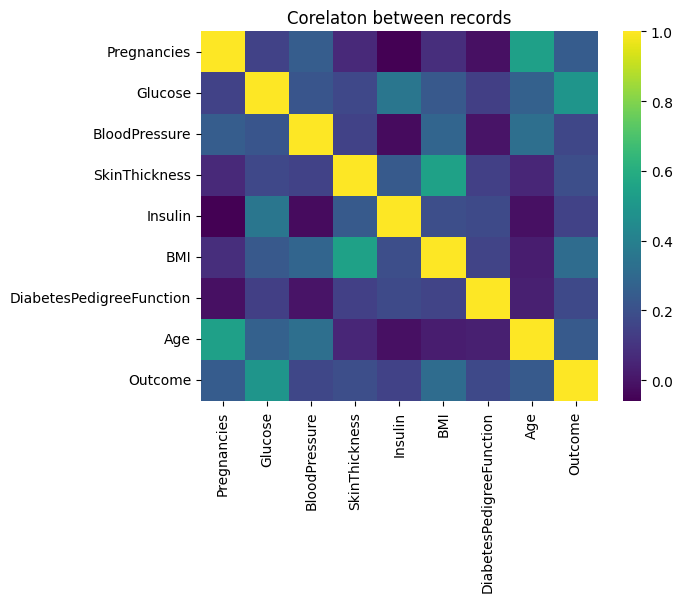

In [20]:
sns.heatmap(corr_matrix,cmap="viridis")
plt.title("Corelaton between records")
plt.show()

## Splitting Data 

In [21]:
X=df2.drop("Outcome",axis=1)
Y=df2["Outcome"]

In [22]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,3,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [23]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [24]:
#Feature Scaling

In [25]:
Scaler=StandardScaler()

In [26]:
X_scaled=Scaler.fit_transform(X)

In [27]:
X_scaled

array([[ 0.57007018,  0.86604475, -0.03198993, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-1.08580689, -1.20506583, -0.5283186 , ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23242101,  2.01666174, -0.69376149, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.23889477, -0.02157407, -0.03198993, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-1.08580689,  0.14279979, -1.02464727, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-1.08580689, -0.94206766, -0.19743282, ..., -0.29849289,
        -0.47378505, -0.87137393]], shape=(768, 8))

In [28]:
#Train-Test split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

## Model Training

In [122]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [123]:
X_train_rf = rf.apply(X_train)
X_test_rf = rf.apply(X_test)

In [124]:
Model=LogisticRegression(max_iter=1000,class_weight='balanced')

In [125]:
Model.fit(X_train_rf,Y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

## Model Evaluation

In [126]:
prediction=Model.predict(X_test_rf)

In [127]:
accuracy = accuracy_score(Y_test, prediction)
print("Accuracy:", accuracy)

Accuracy: 0.7402597402597403


In [128]:
report=classification_report(Y_test,prediction)

In [129]:
print(report)

              precision    recall  f1-score   support

           0       0.85      0.73      0.78        99
           1       0.61      0.76      0.68        55

    accuracy                           0.74       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.76      0.74      0.75       154



## Saving the Models and Scaler

In [ ]:
from joblib import dump, load


dump(rf, 'RfMode.joblib')

dump(Model, 'LReg.joblib')

dump(Scaler, 'Scaler.joblib')